In [252]:
import pprint
import requests
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import time
import nltk
import re
from pandas.io.json import json_normalize
from sklearn.cluster import SpectralClustering
from math import sqrt, floor

# Obtain data

In [240]:
r = requests.get("https://api.nytimes.com/svc/books/v3/lists/2019-08-11/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH")

In [241]:
bs = r.json()

In [243]:
for key in bs.keys():
    print(key)

status
copyright
num_results
last_modified
results


In [245]:
bs = json_normalize(bs["results"]["books"])

In [246]:
bs.head()

,age_group,amazon_product_url,article_chapter_link,asterisk,author,book_image,book_image_height,book_image_width,book_review_link,book_uri,...,isbns,price,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,weeks_on_list
0,,https://www.amazon.com/One-Good-Deed-David-Bal...,,0,David Baldacci,https://s1.nyt.com/du/books/images/97815387505...,495,328,,nyt://book/f98ddab9-e895-565a-818a-b4488ec8c2e4,...,"[{'isbn10': '1538750562', 'isbn13': '978153875...",0,1538750554,9781538750551,Grand Central,1,0,,ONE GOOD DEED,1
1,,https://www.amazon.com/Where-Crawdads-Sing-Del...,,0,Delia Owens,https://s1.nyt.com/du/books/images/97807352190...,495,328,,nyt://book/053b4109-4555-5aa1-9b39-cc40549bcdf0,...,"[{'isbn10': '0735219095', 'isbn13': '978073521...",0,0735219095,9780735219090,Putnam,2,2,,WHERE THE CRAWDADS SING,46
2,,https://www.amazon.com/New-Girl-Novel-Gabriel-...,,0,Daniel Silva,https://s1.nyt.com/du/books/images/97800628348...,495,328,,nyt://book/e308e25d-b1dd-559d-92b2-ec81b7bbad80,...,"[{'isbn10': '0062834835', 'isbn13': '978006283...",0,0062834894,9780062834898,Harper,3,1,,THE NEW GIRL,2
3,,https://www.amazon.com/Nickel-Boys-Novel-Colso...,,0,Colson Whitehead,https://s1.nyt.com/du/books/images/97803855370...,495,328,https://www.nytimes.com/2019/07/11/books/revie...,nyt://book/b9c84bf7-ad1c-56a3-9b42-e9b37e488f42,...,"[{'isbn10': '0385537077', 'isbn13': '978038553...",0,0385537077,9780385537070,Doubleday,4,3,,THE NICKEL BOYS,2
4,,https://www.amazon.com/Reckoning-Novel-John-Gr...,,0,John Grisham,https://s1.nyt.com/du/books/images/97803855441...,495,326,,nyt://book/821816fe-b672-571b-8cc7-5a23a25b58e8,...,"[{'isbn10': '0385544154', 'isbn13': '978038554...",0,0525620931,9780525620938,Doubleday,5,8,,THE RECKONING,24


In [158]:
#sample request: https://api.nytimes.com/svc/books/v3/lists/2017-03-13/Combined%20Print%20and%20E-Book%20Fiction.json?api_key=<your_api_key>
BOOKS_ROOT = "https://api.nytimes.com/svc/books/v3/lists"
LIST = "combined-print-and-e-book-fiction"   #you can change to other lists available at https://developer.nytimes.com

# Add your API key here
API_KEY = "LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH"


bestsellers = []
num_calls_to_make = 52 # you can use up to 1000 api calls a day so max=1000
ctr = 0

# lists update once a week, every Sunday
for i in range(0,num_calls_to_make):
    today = datetime.datetime.today()
    idx = (today.weekday() + 1) % 7
    last_sun = today - datetime.timedelta((7*ctr)+idx)
    last_sun = last_sun.date()
    print(last_sun)
    url = "%s/%s/%s?api-key=%s" % (BOOKS_ROOT, last_sun, LIST, API_KEY)
    url = url.strip()
    print(url)
    r = requests.get(url)
    if (r.status_code == 200):
        results = r.json()
        books = json_normalize(results["results"]["books"]) #parse_books(results, date)
        bestsellers.append(books)
    else:
        print("API call did not work!")
        print(r)
        #break
    ctr = ctr + 1
    time.sleep(6)
    #if (bestsellers[0].keys() is not None):
    #    keys = bestsellers[0].keys()
    #    # Print all results to a csv file
    #    with open('bestsellers.csv', 'wb') as output_file:
    #        dict_writer = csv.DictWriter(output_file, keys)
    #        dict_writer.writeheader()
    #        dict_writer.writerows(bestsellers)
bestsellers_df = pd.concat(bestsellers)
bestsellers_df.to_csv("last_year_books.csv")

2019-08-11
https://api.nytimes.com/svc/books/v3/lists/2019-08-11/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-08-04
https://api.nytimes.com/svc/books/v3/lists/2019-08-04/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-07-28
https://api.nytimes.com/svc/books/v3/lists/2019-07-28/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-07-21
https://api.nytimes.com/svc/books/v3/lists/2019-07-21/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-07-14
https://api.nytimes.com/svc/books/v3/lists/2019-07-14/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-07-07
https://api.nytimes.com/svc/books/v3/lists/2019-07-07/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-06-30
https://api.nytimes.com/svc/books/v3/lists/2019-06-30/combined-print-and-e-book-fiction?api-key=LarCbQ96wJoZWk2SH42j8MZhCgAMLGwH
2019-06-23
https://a

In [165]:
bestsellers_df.drop_duplicates(subset=['author','title'], inplace=True)

In [160]:
bestsellers_df.head()

,age_group,amazon_product_url,article_chapter_link,asterisk,author,book_image,book_image_height,book_image_width,book_review_link,book_uri,...,isbns,price,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,weeks_on_list
0,,https://www.amazon.com/One-Good-Deed-David-Bal...,,0,David Baldacci,https://s1.nyt.com/du/books/images/97815387505...,495,328,,nyt://book/f98ddab9-e895-565a-818a-b4488ec8c2e4,...,"[{'isbn10': '1538750562', 'isbn13': '978153875...",0,1538750554,9781538750551,Grand Central,1,0,,ONE GOOD DEED,1
1,,https://www.amazon.com/Where-Crawdads-Sing-Del...,,0,Delia Owens,https://s1.nyt.com/du/books/images/97807352190...,495,328,,nyt://book/053b4109-4555-5aa1-9b39-cc40549bcdf0,...,"[{'isbn10': '0735219095', 'isbn13': '978073521...",0,0735219095,9780735219090,Putnam,2,2,,WHERE THE CRAWDADS SING,46
2,,https://www.amazon.com/New-Girl-Novel-Gabriel-...,,0,Daniel Silva,https://s1.nyt.com/du/books/images/97800628348...,495,328,,nyt://book/e308e25d-b1dd-559d-92b2-ec81b7bbad80,...,"[{'isbn10': '0062834835', 'isbn13': '978006283...",0,0062834894,9780062834898,Harper,3,1,,THE NEW GIRL,2
3,,https://www.amazon.com/Nickel-Boys-Novel-Colso...,,0,Colson Whitehead,https://s1.nyt.com/du/books/images/97803855370...,495,328,https://www.nytimes.com/2019/07/11/books/revie...,nyt://book/b9c84bf7-ad1c-56a3-9b42-e9b37e488f42,...,"[{'isbn10': '0385537077', 'isbn13': '978038553...",0,0385537077,9780385537070,Doubleday,4,3,,THE NICKEL BOYS,2
4,,https://www.amazon.com/Reckoning-Novel-John-Gr...,,0,John Grisham,https://s1.nyt.com/du/books/images/97803855441...,495,326,,nyt://book/821816fe-b672-571b-8cc7-5a23a25b58e8,...,"[{'isbn10': '0385544154', 'isbn13': '978038554...",0,0525620931,9780525620938,Doubleday,5,8,,THE RECKONING,24


In [166]:
bestsellers_df.shape

(272, 26)

In [167]:
titles = bestsellers_df["title"]
print(len(titles))
print(bestsellers_df.shape)

272
(272, 26)


There are 24002 words in the combination of all titles.


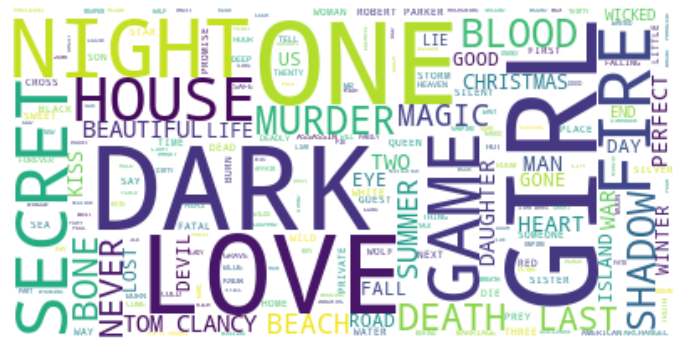

In [177]:
best5 = pd.read_csv("last_five_years_books.csv")
best5.drop_duplicates(subset=['author','title'], inplace=True)
titles5 = best5["title"]

from wordcloud import WordCloud, STOPWORDS
all_titles = " ".join(title for title in titles5)
stopwords= set(STOPWORDS)
print("There are {} words in the combination of all titles.".format(len(all_titles)))

wc = WordCloud(background_color="white") 
               #max_words=2000, 
               #min_font_size =8, 
               #max_font_size=20, 
               #relative_scaling = 0.5, 
               #stopwords=stopwords,
               #normalize_plurals= True)
one_year = wc.generate(all_titles)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()
one_year.to_file("five_years.png")

In [180]:
matching = [s for s in titles5 if "GAME" in s]
print(matching)
#best5["author"][bestsellers_df["title"]=="THE GOVERNESS GAME"]

['SKIN GAME', 'A GAME OF THRONES', 'THE NEVER GAME', 'TOXIC GAME', 'THE GOVERNESS GAME', 'COVERT GAME', 'END GAME', 'MIND GAME', 'THE LYING GAME', 'MURDER GAMES', 'DANGEROUS GAMES', 'POWER GAME', 'MARRIAGE GAMES', 'THE GAMES', 'SPIDER GAME', 'THE END GAME', 'VIPER GAME']


In [259]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    #print("un-lemmad word: ", word)
    lemma = wn.morphy(word)
    #print("lemma-d word: ", lemma)
    if lemma is None:
        return word
    else:
        return lemma

from spacy.lang.en import English
from nltk.corpus import stopwords
import string
parser = English()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        #lemmatizes, converts to lowercase, omits pronouns
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    #removes stop word tokens and symbols
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    tokens = [token for token in tokens if len(token) > 3]
    # here we are lemmatizing again too; noticed that previous lemmatization doesn't handle plurals
    tokens = [get_lemma(token) for token in tokens]
    return tokens

from sklearn.feature_extraction.text import TfidfVectorizer

print(tokenizeText("A Game of Thrones"))
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenizeText, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(titles5)

[nltk_data] Downloading package wordnet to /Users/sjones/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['game', 'throne']


/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['good', 'little', 'make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 578 ms, sys: 65.4 ms, total: 644 ms
Wall time: 708 ms


In [261]:
from sklearn.cluster import KMeans

num_clusters = floor(sqrt(bestsellers_df.shape[0]))

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(len(clusters))
print(bestsellers_df.shape[0])

CPU times: user 627 ms, sys: 6.54 ms, total: 633 ms
Wall time: 334 ms
1494
272


In [254]:
clustering = SpectralClustering(n_clusters=num_clusters,
                               assign_labels="discretize",
                               n_neighbors=num_clusters).fit(tfidf_matrix)

In [260]:
# look at distrobution of cluster labels
cluster_counts = pd.Series(clustering.labels_).value_counts()
print(cluster_counts)

1     1246
13      39
15      28
11      24
6       23
4       22
10      19
9       17
8       17
7       12
12      11
5       10
2        8
14       7
0        6
3        5
dtype: int64


In [257]:
def get_post_info_by_cluster(number, 
                             data,
                             cluster):
    return(data[cluster.labels_ == number])

for i in range(num_clusters):
    
    print(f"Cluster {i}:\n")
    print(get_post_info_by_cluster(i, 
                                   data = titles5,
                                   cluster = clustering))
    print("\n")

Cluster 0:

446              EVERY BREATH
974           ONE LAST BREATH
1334    EVERY BREATH YOU TAKE
1691             DYING BREATH
2393        WITH EVERY BREATH
3766         YOUR NEXT BREATH
Name: title, dtype: object


Cluster 1:

0                                           ONE GOOD DEED
1                                 WHERE THE CRAWDADS SING
3                                         THE NICKEL BOYS
4                                           THE RECKONING
5                                         THRAWN: TREASON
6                                          UNDER CURRENTS
8                                    BEFORE WE WERE YOURS
9                              THE TATTOOIST OF AUSCHWITZ
10                                      WINDOW ON THE BAY
11                                LITTLE FIRES EVERYWHERE
13                    ELEANOR OLIPHANT IS COMPLETELY FINE
14                                            THE SEEKERS
18      THE ADVENTURE ZONE: MURDER ON THE ROCKPORT LIM...
23           

In [233]:
books = { 'title': titles5, 'cluster': clusters }

bframe = pd.DataFrame(books, columns = ['title', 'cluster'])
#bframe.set_index('cluster')
#print(bframe['title'][bframe.cluster == 0].values.tolist())

In [234]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    #print("Cluster %d words:" % i, end='')
    
    #for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
    #    print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    #print() #add whitespace
    #print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in bframe['title'][bframe.cluster == i].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 titles: ONE GOOD DEED, WHERE THE CRAWDADS SING, THE NICKEL BOYS, THE RECKONING, THRAWN: TREASON, UNDER CURRENTS, SUMMER OF '69, BEFORE WE WERE YOURS, THE TATTOOIST OF AUSCHWITZ, WINDOW ON THE BAY, LITTLE FIRES EVERYWHERE, ELEANOR OLIPHANT IS COMPLETELY FINE, THE SEEKERS, THE ADVENTURE ZONE: MURDER ON THE ROCKPORT LIMITED!, EVVIE DRAKE STARTS OVER, SHAMED, SOLD ON A MONDAY, KNIFE, BACKLASH, MRS. EVERYTHING, THE OVERSTORY, THE CHAIN, COTTAGE BY THE SEA, SOMEONE TO HONOR, LOST AND FOUND, NINE PERFECT STRANGERS, SURFSIDE SISTERS, BIG SKY, SAY NO TO THE DUKE, BREATHLESS, UNSOLVED, GOOD OMENS, TOM CLANCY: ENEMY CONTACT, THE ORACLE, THERE GOES MY HEART, PAST TENSE, RECURSION, THE SUMMER GUESTS, REDEMPTION, QUEEN BEE, THE SUMMER OF SUNSHINE AND MARGOT, SHADOW WARRIOR, SKIN GAME, WOLF RAIN, SEARCHING FOR SYLVIE LEE, A GAME OF THRONES, THE 18TH ABDUCTION, SUNSET BEACH, THE GUEST BOOK, THE MISTER, THE STIEHL ASSASSIN, THE WOMAN IN THE WINDOW, A GENTLEMAN IN MOSCO

There are 4470 words in the combination of all titles.


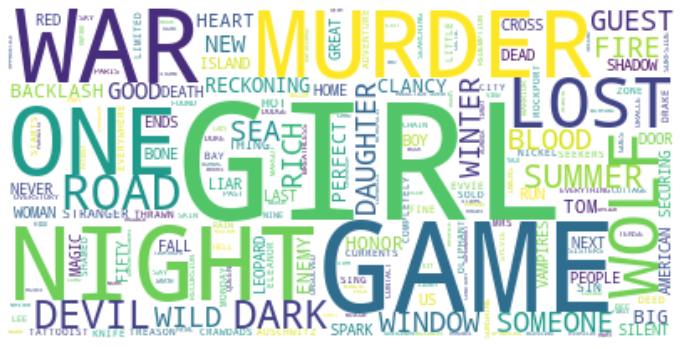

In [168]:
from wordcloud import WordCloud, STOPWORDS
all_titles = " ".join(title for title in titles)
stopwords= set(STOPWORDS)
print("There are {} words in the combination of all titles.".format(len(all_titles)))

wc = WordCloud(background_color="white") 
               #max_words=2000, 
               #min_font_size =8, 
               #max_font_size=20, 
               #relative_scaling = 0.5, 
               #stopwords=stopwords,
               #normalize_plurals= True)
one_year = wc.generate(all_titles)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()
one_year.to_file("one_year.png")

In [175]:
matching = [s for s in titles if "GAME" in s]
bestsellers_df["author"][bestsellers_df["title"]=="THE GOVERNESS GAME"]

9    Tessa Dare
Name: author, dtype: object

In [174]:
matching

['SKIN GAME',
 'A GAME OF THRONES',
 'THE NEVER GAME',
 'TOXIC GAME',
 'THE GOVERNESS GAME']